# Intro 1
Certainly! Let's discuss how to simulate a Single Input Module (SIM) biological circuit using Ordinary Differential Equations (ODEs), tailored for an undergraduate biochemistry student in a Biophysics course.

### Understanding SIM Biological Circuits

1. **What is a SIM?** 
   - A Single Input Module (SIM) in a biological context is a simplified system where a single input (like a signaling molecule) controls a biological process. This input could be a hormone, a neurotransmitter, a nutrient, or any molecule that triggers a biological response.

2. **Example Scenario:**
   - Imagine a hormone (let's call it Hormone H) that, upon entering a cell, triggers a series of biochemical reactions leading to the production of a specific protein.

### Role of ODEs in SIM

1. **Why Use ODEs?**
   - ODEs allow us to model the rate of change of concentrations over time in a dynamic biological system. Each component of the SIM can be represented by an ODE that encapsulates its behavior and interactions.

2. **Components of the Model:**
   - For instance, in our example, we might model the concentration of Hormone H, the activation state of a receptor, and the production rate of the protein.

### Building the ODE Model

1. **Identify Variables and Parameters:**
   - Variables: Concentrations of Hormone H, activated receptor, and protein.
   - Parameters: Reaction rates, binding affinities, degradation rates, etc.

2. **Formulate ODEs:**
   - **Hormone-Receptor Interaction**: An ODE to describe how Hormone H binds to its receptor, possibly following a saturation kinetics (like Michaelis-Menten).
   - **Signal Transduction**: An ODE to represent the activation of the signaling pathway leading to protein production.
   - **Protein Production and Degradation**: An ODE for the rate of protein synthesis and its degradation over time.

### Simulating the Model

1. **Using Computational Tools:**
   - Tools like MATLAB, Python (with SciPy and NumPy), or specialized software like COPASI can be used to solve these ODEs numerically.
   - You input the initial concentrations, parameter values, and the ODEs into the software.

2. **Running the Simulation:**
   - The simulation will calculate the concentrations of each component at various time points.
   - This helps in understanding how the initial input (Hormone H in our example) influences the entire biological process over time.

### Analyzing Results

1. **Understanding Dynamics:**
   - The output will show how the system responds to the input over time, like how quickly the protein is produced in response to the hormone and when it reaches a steady state.
   - You can observe transient behaviors, like any initial lag, peak response, and eventual stabilization.

2. **Exploring Variations:**
   - By changing parameter values (like increasing hormone concentration), you can explore how the system behaves under different conditions. This is crucial for understanding the robustness and sensitivity of biological circuits.

### Conclusion

- Simulating a SIM biological circuit using ODEs offers a powerful way to understand complex biochemical interactions and dynamics.
- It provides a quantitative framework to predict how changes in one part of the system can affect the whole, which is essential in fields like pharmacology, metabolic engineering, and systems biology.

# Intro 2
This Python code is an excellent practical example to demonstrate the simulation of a Single Input Module (SIM) biological circuit involving a transcription factor \( X \) and two regulated genes \( Z \) and \( Z_2 \). For an undergraduate biochemistry student in a Biophysics course, this provides a hands-on approach to understanding the dynamics of gene regulation and protein production in a simplified system.

### Overview of the SIM System in the Code:

1. **Components of the SIM**:
   - **Transcription Factor \( X \)**: Acts as the single input in this module, regulating the expression of genes \( Z \) and \( Z_2 \).
   - **Genes \( Z \) and \( Z_2 \)**: Their expression is regulated by the transcription factor \( X \), but each responds at a different threshold level of \( X \).

2. **ODEs (Ordinary Differential Equations)**:
   - Each component (X, Z, Z2) is represented by an ODE that models its rate of change over time.
   - The ODEs incorporate production, decay, and regulation mechanisms based on the concentration of \( X \).

### Key Features of the Simulation:

1. **Dynamic Regulation**:
   - The transcription factor \( X \) is produced up to a certain time point (t = 10) and then decays.
   - Genes \( Z \) and \( Z_2 \) are activated at different threshold concentrations of \( X \), reflecting different regulatory dynamics.

2. **Parameter Settings**:
   - `alpha_X, beta_X` etc., are parameters defining the rate of production and decay for \( X, Z, \) and \( Z_2 \).
   - `X_threshold` and `X_threshold2` are the critical concentrations of \( X \) that trigger the expression of \( Z \) and \( Z_2 \), respectively.

3. **LIFO (Last In, First Out) Temporal Program**:
   - In the context of this simulation, LIFO refers to the order in which gene expression is turned off as the level of \( X \) decreases.
   - Since \( Z_2 \) has a higher threshold (7) for activation compared to \( Z \) (4), it will be the last to be activated and the first to be deactivated as \( X \) decreases.
   - This creates a temporal sequence in the gene expression pattern, an important aspect when studying developmental processes or response mechanisms in biological systems.

### Visualizing the Dynamics:

- The plot generated by the code illustrates how the concentrations of \( X \), \( Z \), and \( Z_2 \) change over time.
- It helps in visualizing the sequential activation and deactivation of genes \( Z \) and \( Z_2 \) based on the dynamics of the transcription factor \( X \).

### Conclusion:

- This simulation provides a clear, visual understanding of how a single input (the transcription factor \( X \)) can differentially regulate multiple genes in a biological system.
- Such models are invaluable in biophysics and biochemistry for predicting cellular behavior, understanding regulatory mechanisms, and exploring the effects of different parameters on biological systems.

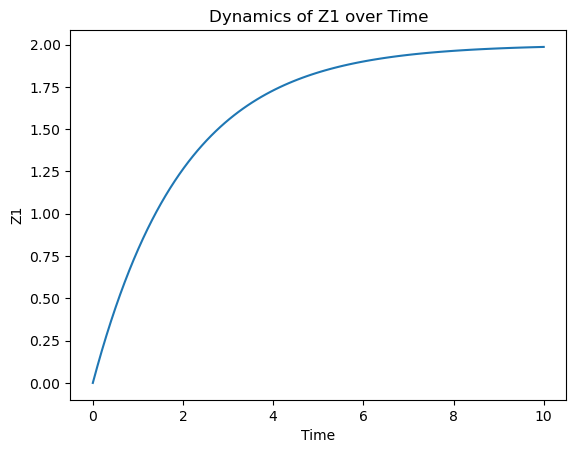

In [8]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation
def model(Z1, t, alpha, beta):
    dZ1dt = beta - alpha * Z1
    return dZ1dt

# Parameters
alpha = 0.5   # Example value for alpha
beta = 1    # Example value for beta

# Initial condition
Z1_0 = 0

# Time points (0 to 10, with 100 points in between)
t = np.linspace(0, 10, 100)

# Integrate the ODE
Z1 = odeint(model, Z1_0, t, args=(alpha, beta))

# Plot results
plt.plot(t, Z1)
plt.xlabel('Time')
plt.ylabel('Z1')
plt.title('Dynamics of Z1 over Time')
plt.show()


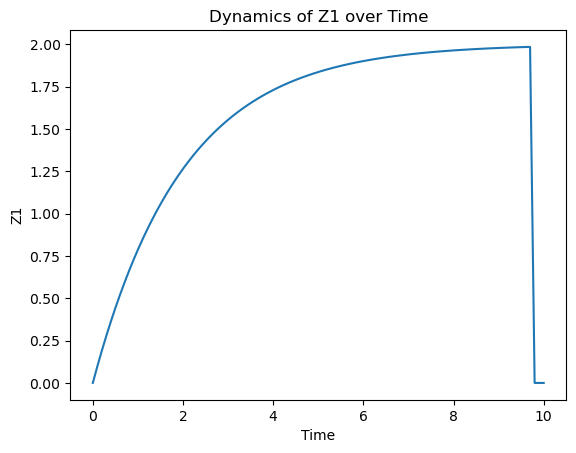

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation with condition for beta
def model(Z1, t, alpha, beta, threshold):
    if np.abs(beta - alpha * Z1) < threshold:  # Condition for stationary state
        beta = 0
    dZ1dt = beta - alpha * Z1
    return dZ1dt

# Parameters
alpha = 0.5    # Example value for alpha
beta = 1     # Example value for beta
threshold = 0.008 # Threshold to determine stationary state

# Initial condition
Z1_0 = 0.0

# Time points (0 to 10, with 100 points in between)
t = np.linspace(0, 10, 100)

# Integrate the ODE
Z1 = odeint(model, Z1_0, t, args=(alpha, beta, threshold))

# Plot results
plt.plot(t, Z1)
plt.xlabel('Time')
plt.ylabel('Z1')
plt.title('Dynamics of Z1 over Time')
plt.show()


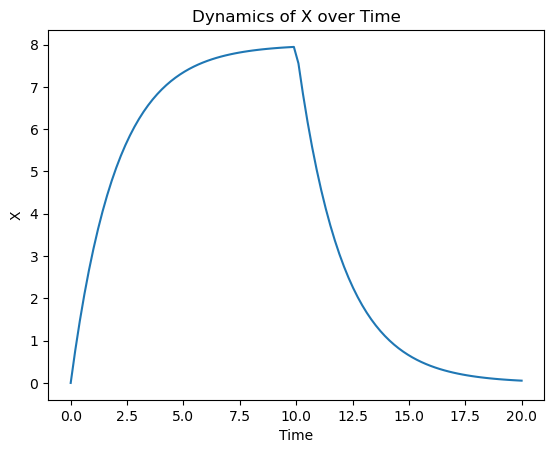

In [50]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equation with condition for decay
def model(X, t, alpha, beta):
    if t >= 10: # switch to no X production at a given t
        dXdt = -alpha * X
    else:
        dXdt = beta - alpha * X
    return dXdt

# Parameters
alpha = 0.5    # Example value for alpha
beta = 4    # Example value for beta


# Initial condition
X_0 = 0.0

# Time points (0 to 10, with 100 points in between)
t = np.linspace(0, 20, 100)

# Integrate the ODE
X = odeint(model, X_0, t, args=(alpha, beta))

# Plot results
plt.plot(t, X)
plt.xlabel('Time')
plt.ylabel('X')
plt.title('Dynamics of X over Time')
plt.show()


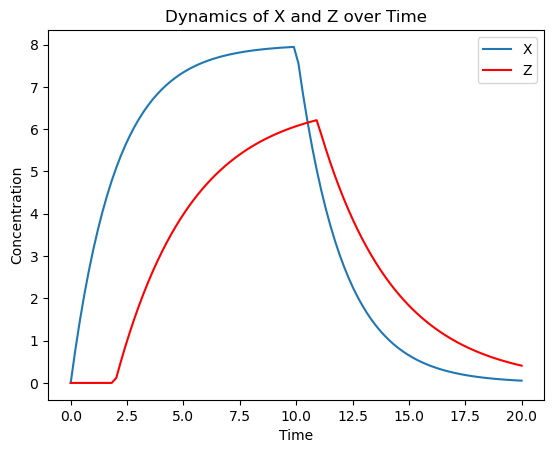

In [54]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(conditions, t, alpha_X, beta_X, alpha_Z, beta_Z, X_threshold):
    X, Z = conditions

    # Equation for X
    if t >= 10:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equation for Z
    if X > X_threshold:
        dZdt = beta_Z - alpha_Z * Z
    else:
        dZdt = -alpha_Z * Z

    return [dXdt, dZdt]

# Parameters for X and Z
alpha_X = 0.5
beta_X = 4
alpha_Z = 0.3
beta_Z = 2
X_threshold = 5

# Initial conditions
X_0 = 0.0
Z_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [X_0, Z_0], t, args=(alpha_X, beta_X, alpha_Z, beta_Z, X_threshold))

# Extract X and Z
X, Z = conditions.T

# Plot results
plt.plot(t, X, label='X')
plt.plot(t, Z, label='Z', color='red')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of X and Z over Time')
plt.legend()
plt.show()

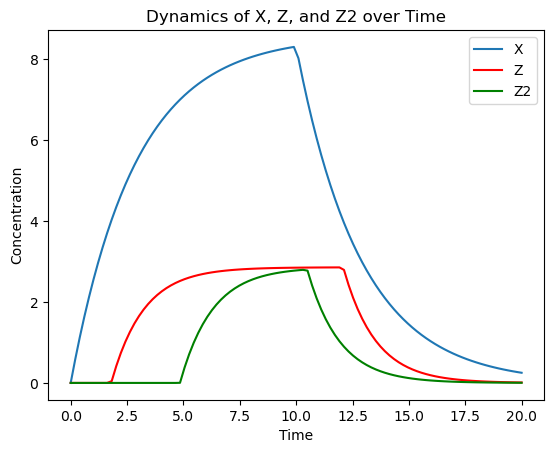

In [70]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(conditions, t, alpha_X, beta_X, alpha_Z, beta_Z, X_threshold, alpha_Z2, beta_Z2, X_threshold2):
    X, Z, Z2 = conditions

    # Equation for X
    if t >= 10:
        dXdt = -alpha_X * X
    else:
        dXdt = beta_X - alpha_X * X

    # Equation for Z
    if X > X_threshold:
        dZdt = beta_Z - alpha_Z * Z
    else:
        dZdt = -alpha_Z * Z

    # Equation for Z2
    if X > X_threshold2:
        dZ2dt = beta_Z2 - alpha_Z2 * Z2
    else:
        dZ2dt = -alpha_Z2 * Z2

    return [dXdt, dZdt, dZ2dt]

# Parameters for X, Z, and Z2
alpha_X = 0.35
beta_X = 3
alpha_Z = 0.7
beta_Z = 2
X_threshold = 4
alpha_Z2 = 0.7
beta_Z2 = 2
X_threshold2 = 7

# Initial conditions
X_0 = 0.0
Z_0 = 0.0
Z2_0 = 0.0

# Time points
t = np.linspace(0, 20, 100)

# Solve the system of ODEs
conditions = odeint(system, [X_0, Z_0, Z2_0], t, args=(alpha_X, beta_X, alpha_Z, beta_Z, X_threshold, alpha_Z2, beta_Z2, X_threshold2))

# Extract X, Z, and Z2
X, Z, Z2 = conditions.T

# Plot results
plt.plot(t, X, label='X')
plt.plot(t, Z, label='Z', color='red')
plt.plot(t, Z2, label='Z2', color='green')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Dynamics of X, Z, and Z2 over Time')
plt.legend()
plt.show()
